## Task I: Quantum Computing

1) implement a simple quantum operation with Cirq or Pennylane<br/>  
a) With 5 qubits <br/>
b) Apply Hadamard operation on every qubit <br/>
c) Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4) <br/>
d) SWAP (0, 4) <br/>
e) Rotate X with pi/2 on any qubit <br/>
f) Plot the circuit 


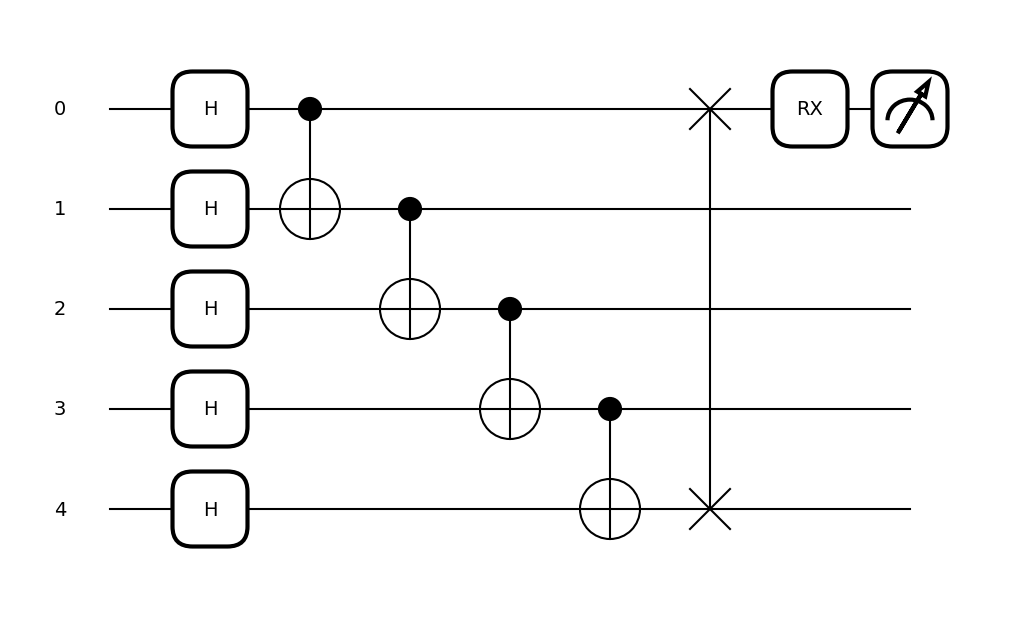

In [2]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np

dev = qml.device("default.qubit", wires=5)

@qml.qnode(dev)
def first_circuit(x):
    for i in range(5):
        qml.Hadamard(i)
    for i in range(4):
        qml.CNOT(wires=[i,i+1])
    qml.SWAP(wires=[0,4])
    qml.RX(x, 0)
    return qml.expval(qml.PauliZ(0))

qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(first_circuit)(np.pi/2)
plt.show()

2) implement a second circuit with a framework of your choice<br/>  
a) Apply a Hadamard gate to the first qubit <br/>
b) rotate the second qubit by pi/3 around X <br/>
c) Apply Hadamard gate to the third and fourth qubit <br/>
d) Perform a swap test between the states of $\ket{q_1q_2}$ and $\ket{q_3q_4}$

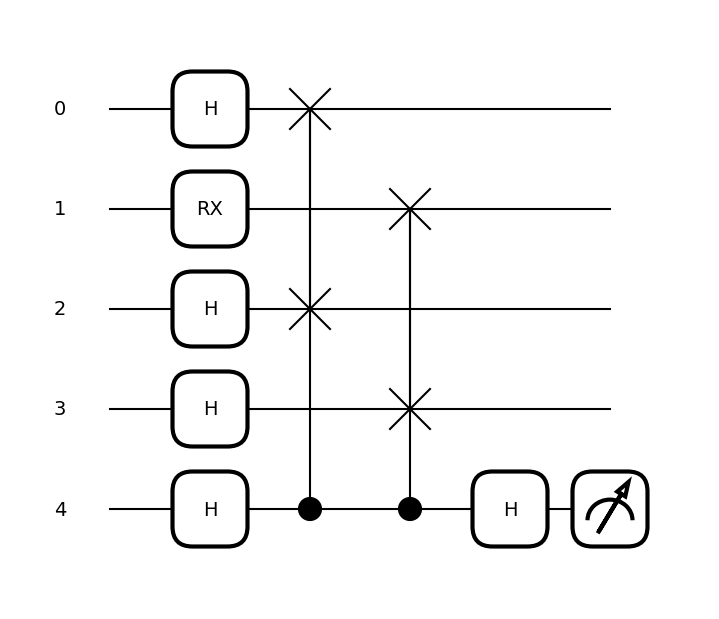

In [9]:
dev = qml.device("default.qubit", wires=5)

@qml.qnode(dev)
def second_circuit(x):
    qml.Hadamard(0)
    qml.RX(x,1)
    qml.Hadamard(2)
    qml.Hadamard(3)
    qml.Hadamard(4)
    qml.CSWAP(wires=[4,0,2])
    qml.CSWAP(wires=[4,1,3])
    qml.Hadamard(4)
    return qml.probs(wires=4)

qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(second_circuit)(np.pi/3)
plt.show()

In [22]:
probabilities = second_circuit(np.pi/3).tolist()
print(f"The ancilla qubit probability is : {probabilities[0]} for 0 and {probabilities[1]} for 1")

The ancilla qubit probability is : 0.7499999999999994 for 0 and 0.24999999999999978 for 1
